# E-Commerce Sales Data Analysis
This project analyzes sales performance across product categories and regions to identify key business insights. The dataset includes order details such as product category, quantity, price, total sales amount, and region.


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("ecommerce_sales_data.csv")

# Preview first few rows
df.head()


,Order ID,Order Date,Customer ID,Product Category,Product Name,Quantity,Price,Total Amount,Region
0,325516,2024-02-04,6902,Clothing,T-Shirt,3,1618.75,4856.25,North
1,200860,2024-03-21,8918,Books,Self-Help,4,2313.11,9252.44,North
2,669961,2024-10-12,4166,Home Decor,Clock,5,4851.19,24255.95,North
3,878008,2024-01-21,6248,Beauty,Moisturizer,3,1218.79,3656.37,South
4,615822,2024-04-11,2996,Beauty,Face Wash,2,4552.79,9105.58,South


## Data Overview
Checking the structure of the dataset and basic statistics.


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          400 non-null    int64  
 1   Order Date        400 non-null    object 
 2   Customer ID       400 non-null    int64  
 3   Product Category  400 non-null    object 
 4   Product Name      400 non-null    object 
 5   Quantity          400 non-null    int64  
 6   Price             400 non-null    float64
 7   Total Amount      400 non-null    float64
 8   Region            400 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 28.3+ KB


Order ID            0
Order Date          0
Customer ID         0
Product Category    0
Product Name        0
Quantity            0
Price               0
Total Amount        0
Region              0
dtype: int64

## Data Cleaning and Feature Engineering
We will convert date columns into datetime format, create new time-based features, and check for duplicates.


In [3]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create Month and Year columns for analysis
df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year

# Check for duplicate rows
df.duplicated().sum()


np.int64(0)

## Exploratory Data Analysis (EDA)
We will analyze total sales, top-selling categories, and sales trends across regions and months.


In [4]:
# Total Sales
total_sales = df['Total Amount'].sum()

# Sales by Product Category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Sales by Region
sales_by_region = df.groupby('Region')['Total Amount'].sum().sort_values(ascending=False)

# Monthly Sales Trend
monthly_sales = df.groupby('Month')['Total Amount'].sum()

total_sales, sales_by_category, sales_by_region, monthly_sales


(np.float64(3215155.74),
 Product Category
 Beauty         775772.94
 Home Decor     704047.51
 Clothing       651047.68
 Books          602611.83
 Electronics    481675.78
 Name: Total Amount, dtype: float64,
 Region
 West     827735.78
 South    814621.80
 North    796297.57
 East     776500.59
 Name: Total Amount, dtype: float64,
 Month
 April        329326.64
 August       393808.15
 February     368801.17
 January      426039.68
 July         263858.81
 June         332875.68
 March        272011.40
 May          258463.71
 October      241660.47
 September    328310.03
 Name: Total Amount, dtype: float64)

## Data Visualization


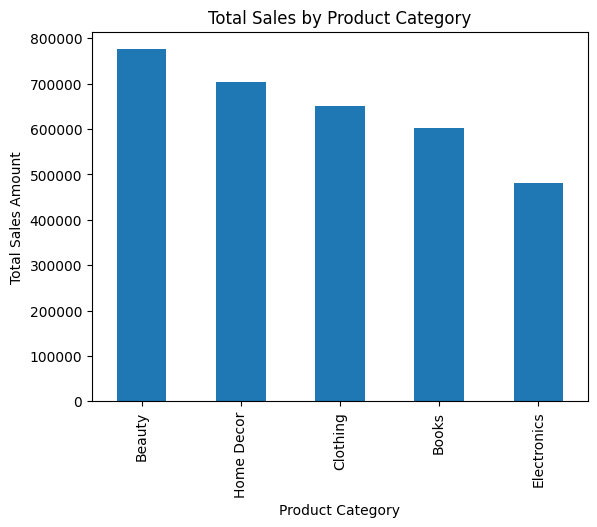

In [5]:
import matplotlib.pyplot as plt

sales_by_category.plot(kind='bar')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.show()


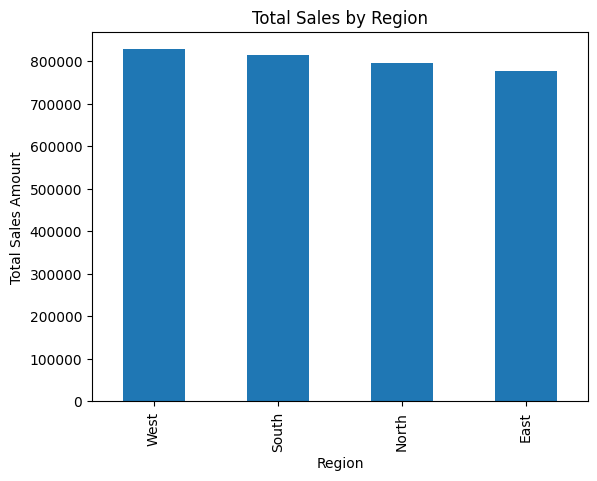

In [6]:
sales_by_region.plot(kind='bar')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.show()


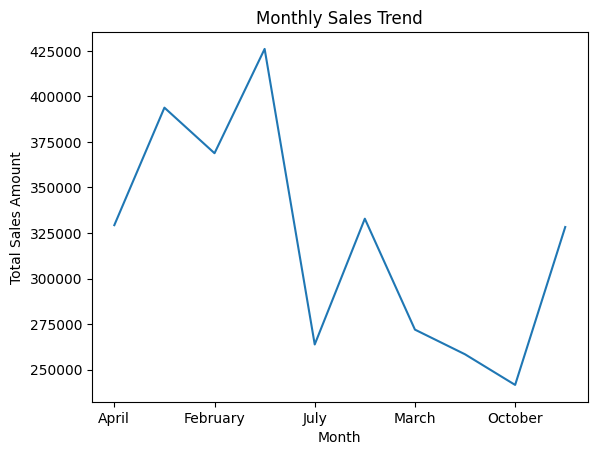

In [7]:
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.show()


## Key Insights
- Total revenue generated is approximately ₹32,15,000.
- The **Beauty** category has the highest sales, followed by **Home Decor** and **Clothing**.
- Sales are highest in the **West** region, with very close competition from **South** and **North**.
- Monthly trends show strong performance in **January, February, and August**, while sales decline slightly in **October**.
